In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import collections as c
import scipy.stats as st

%matplotlib inline

Here inter-reply time is constructed by subtracting the time of the original from the time of the reply for all tweet-reply pairs. No conversations are constructed yet here - just raw tweet-reply pairs

In [2]:
df=pd.read_csv('../data/bbAllConvoLinesDF.csv',sep=';')

/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (31,32,34,35,36,38,39,40,42,43,44,46,47,48,50,51,52,54,55,56,58,59,60,62,63,64,66,67,68,70,71,72,74,75,76,78,79,80,82,83,84,86,87,88,90,91,92,94,95,96,98,99,100,102,103,104,106,107,108,110,111,112,114,115,116,118,119,120,122,123,124,126,127,128,130,131,132,134,135,136,138,139,140,142,143,144,146,147,148,150,151,152,154,155,156,158,159,160,162,163,164,166,167,168,170,171,172,174,175,176,178,179,180,182,183,184,186,187,188,190,191,192) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df['dateObj']=pd.to_datetime(df.date)

In [6]:
len(df)

625731

### Limit the data to the Analysis Window of 10/15/2012-11/23/2012 

In [4]:
df=df[(df.dateObj>=pd.to_datetime('2012-10-15 00:00:00')) & (df.dateObj<pd.to_datetime('2012-11-24 00:00:00'))]

In [9]:
len(df)

527083

In [10]:
len(df[df.replyWhat!=0])

527083

In [5]:
inBBreps=df[df.replyOrigTime!='0'].copy()

In [12]:
len(inBBreps)

8985

### LIMIT the dataset only to tweets that reply to tweets we also have

In [6]:
inBBreps['repSecDiff']=(inBBreps.dateObj-pd.to_datetime(inBBreps.replyOrigTime)).apply(lambda x: np.nan if pd.isnull(x) else x.value/(10**9))

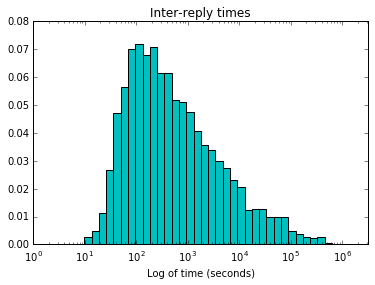

In [7]:
data = inBBreps.repSecDiff.dropna().tolist()
bins=np.logspace(0, int(np.log(max(data))), 100)
width=bins[1:]-bins[:-1]
h, b=np.histogram(data,bins)
h=h/float(sum(h))
plt.figure()
plt.bar(b[:-1], h, width, color='c')
#plt.plot(bins[:-1], fit[:-1]*width, linewidth=2)
plt.gca().set_xscale("log")
plt.xlim(xmin=0,xmax=10**6.5)
plt.ylim(ymin=0, ymax=0.08)
plt.xlabel('Log of time (seconds)')
plt.title('Inter-reply times')
plt.savefig('../data/InterreplyTime.tiff')

In [31]:
np.median(data)

368.0

**Takeway**
* Inter-reply patterns are similar to inter-tweet time (in bbInterReplyTimeOneSide)
* This means that people have similar work session practices for reply activity as just tweets
* So when they reply has more to do with their own tweeting patterns than with the timing of the tweet they are replying to?
* The graph above somewhat confirms it: the long tail suggest that inter-arrival time seems consistent with Poisson process (?)
* **Look into this**
* There is a single work-session practice, but it doesn't have a meaningful center, as it's long-tailed

# Check inter-Reply time for different disaster stages

In [8]:
before=inBBreps[(inBBreps.dateObj>=pd.to_datetime('2012-10-15 00:00:00')) & (inBBreps.dateObj<pd.to_datetime('2012-10-25 00:00:00'))]

In [9]:
during=inBBreps[(inBBreps.dateObj>=pd.to_datetime('2012-10-25 00:00:00')) & (inBBreps.dateObj<pd.to_datetime('2012-11-04 00:00:00'))]

In [10]:
after=inBBreps[(inBBreps.dateObj>=pd.to_datetime('2012-11-04 00:00:00')) & (inBBreps.dateObj<pd.to_datetime('2012-11-14 00:00:00'))]

In [11]:
lafter=inBBreps[(inBBreps.dateObj>=pd.to_datetime('2012-11-14 00:00:00')) & (inBBreps.dateObj<pd.to_datetime('2012-11-24 00:00:00'))]

In [12]:
bSecDiff=before.repSecDiff.dropna().tolist()
dSecDiff=during.repSecDiff.dropna().tolist()
aSecDiff=after.repSecDiff.dropna().tolist()
laSecDiff=lafter.repSecDiff.dropna().tolist()

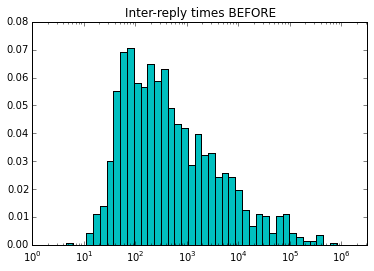

In [18]:
bins=np.logspace(0, int(np.log(max(bSecDiff))), 100)
width=bins[1:]-bins[:-1]
h, b=np.histogram(bSecDiff,bins)
h=h/float(sum(h))
plt.bar(b[:-1], h, width, color='c')
plt.gca().set_xscale("log")
plt.xlim(xmin=0,xmax=10**6.5)
plt.ylim(ymin=0,ymax=0.08)
plt.title('Inter-reply times BEFORE')

In [37]:
np.median(bSecDiff)

323.0

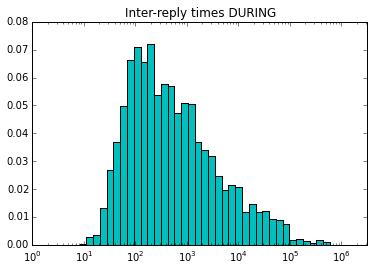

In [20]:
bins=np.logspace(0, int(np.log(max(dSecDiff))), 100)
width=bins[1:]-bins[:-1]
h, b=np.histogram(dSecDiff,bins)
h=h/float(sum(h))
plt.bar(b[:-1], h, width, color='c')
plt.gca().set_xscale("log")
plt.xlim(xmin=0,xmax=10**6.5)
plt.ylim(ymin=0,ymax=0.08)
plt.title('Inter-reply times DURING')

In [21]:
np.median(dSecDiff)

383.0

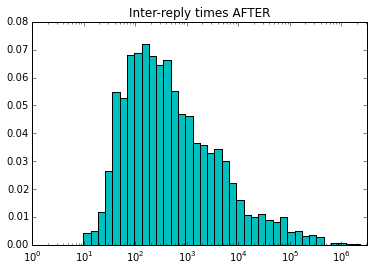

In [22]:
bins=np.logspace(0, int(np.log(max(aSecDiff))), 100)
width=bins[1:]-bins[:-1]
h, b=np.histogram(aSecDiff,bins)
h=h/float(sum(h))
plt.bar(b[:-1], h, width, color='c')
plt.gca().set_xscale("log")
plt.xlim(xmin=0,xmax=10**6.5)
plt.ylim(ymin=0,ymax=0.08)
plt.title('Inter-reply times AFTER')

In [23]:
np.median(aSecDiff)

363.0

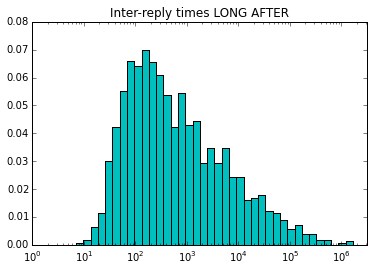

In [24]:
bins=np.logspace(0, int(np.log(max(laSecDiff))), 100)
width=bins[1:]-bins[:-1]
h, b=np.histogram(laSecDiff,bins)
h=h/float(sum(h))
plt.bar(b[:-1], h, width, color='c')
plt.gca().set_xscale("log")
plt.xlim(xmin=0,xmax=10**6.5)
plt.ylim(ymin=0,ymax=0.08)
plt.title('Inter-reply times LONG AFTER')

In [25]:
np.median(laSecDiff)

404.0

### Check if the differences between time slices is stat sig

In [13]:
st.kruskal(bSecDiff,dSecDiff,aSecDiff,laSecDiff)

KruskalResult(statistic=12.761490006596841, pvalue=0.0051818416799547795)

Kruskall-Wallis (non-param ANOVA) is **signifcatnt** - there are differences between these distrbutions. Check which one

### Do Dunn test with Holm-Sidak correction

In [14]:
import Dunn

In [21]:
Dunn.kw_dunn([bSecDiff, dSecDiff, aSecDiff, laSecDiff], [(0,1),(0,2),(0,3)], alpha=0.05, method='hs')

/home/mako0970/ReplyPaperNew/code/Dunn.py:106: UserWarning: We see ties.
  warnings.warn("We see ties.")


(12.761490006596841,
 0.0051818416799547795,
 array([ 2.33119133,  1.41757743,  3.42607219]),
 array([ 0.03909675,  0.15631417,  0.00183601]),
 array([ True, False,  True], dtype=bool))